Name: Wenhao Wu

Student ID: 1304952

In [13]:
import numpy as np
import keras
from keras.preprocessing import image
import matplotlib.pyplot as plt
import tensorflow as tf


In [14]:
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(-1, 28 * 28).astype('float32') / 255.0
x_test = x_test.reshape(-1, 28 * 28).astype('float32') / 255.0

y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

In [15]:
model = keras.models.Sequential()
model.add(keras.layers.Dense(100, input_shape=(28 * 28,), activation='relu'))
model.add(keras.layers.Dense(50, activation='relu'))
model.add(keras.layers.Dense(50, activation='relu'))
model.add(keras.layers.Dense(25, activation='relu'))
model.add(keras.layers.Dense(25, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 100)               78500     
_________________________________________________________________
dense_8 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_9 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_10 (Dense)             (None, 25)                1275      
_________________________________________________________________
dense_11 (Dense)             (None, 25)                650       
_________________________________________________________________
dense_12 (Dense)             (None, 10)                260       
Total params: 88,285
Trainable params: 88,285
Non-trainable params: 0
_________________________________________________________________


In [16]:
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['acc'])

hist = model.fit(x_train, y_train, epochs=20, batch_size=64, validation_data=(x_test,y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 3s 48us/step - loss: 1.6111 - acc: 0.4838 - val_loss: 0.6179 - val_acc: 0.8170
Epoch 2/20
60000/60000 [==============================] - 3s 46us/step - loss: 0.4677 - acc: 0.8632 - val_loss: 0.4215 - val_acc: 0.8609
Epoch 3/20
60000/60000 [==============================] - 3s 46us/step - loss: 0.3171 - acc: 0.9087 - val_loss: 0.3459 - val_acc: 0.8937
Epoch 4/20
60000/60000 [==============================] - 3s 49us/step - loss: 0.2472 - acc: 0.9283 - val_loss: 0.2176 - val_acc: 0.9388
Epoch 5/20
60000/60000 [==============================] - 3s 45us/step - loss: 0.2039 - acc: 0.9406 - val_loss: 0.2009 - val_acc: 0.9417
Epoch 6/20
60000/60000 [==============================] - 3s 50us/step - loss: 0.1758 - acc: 0.9485 - val_loss: 0.1671 - val_acc: 0.9519
Epoch 7/20
60000/60000 [==============================] - 3s 51us/step - loss: 0.1546 - acc: 0.9545 - val_loss: 0.1528 - val_acc

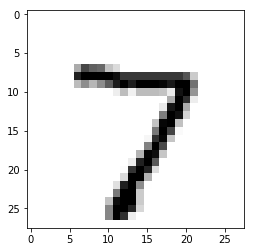

[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]
[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]

Accurancy:  1.0


In [17]:
#Take first 20 elements of the test set and label set
x_pred_test = x_test[:20]
y_pred_label = y_test[:20]

#Draw the first one
plt.imshow(x_pred_test[0].reshape(28,28), cmap=plt.cm.binary)
plt.show()

preds = model.predict(x_pred_test)

pred = []
for x in range(0,len(preds)):
    maxIndex = np.argmax(preds[x])#Take the index of the max element of prediction array
    pred.append(maxIndex)

label = []
for x in range(0,len(y_pred_label)):
    maxIndex = np.argmax(y_pred_label[x])#Take the index of the max element of the label array
    label.append(maxIndex)

arr_pred = np.array(pred)
arr_label = np.array(label)
print(arr_pred)
print(arr_label)
print("\nAccurancy: ",np.sum(arr_pred == arr_label) / len(arr_pred))

The above cell is to use the test data set to verify the caluclation of accurancy.

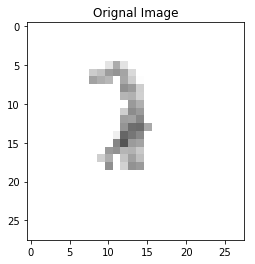

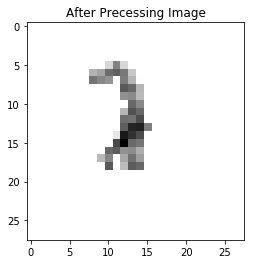

[4 7 8 8 4 5 8 8 8 0 1 8 7 9 8 3 5 8 8 8]
[1 7 3 7 2 6 1 8 9 0 1 7 7 9 8 3 5 4 4 9]

Accurancy:  0.45


In [18]:
imgs = np.zeros(shape=(20,784))
for x in range(1,21):
    img = keras.preprocessing.image.load_img(path='./handwrite/{0}.png'.format(x),
                                             grayscale=True,
                                             target_size=(28,28)) #Set target size with tuple
    arr = np.array(img)
    arr = arr.astype('float32') / 255.0
    arr = arr.reshape(-1, 28*28)
    arr = np.absolute((arr - 1)) #Invert the color, eg [1, 0.6, ....] => [0, 0.4, ...]
    imgs[x-1] = arr
        
name = 4

plt.imshow(keras.preprocessing.image.load_img(path='./handwrite/{0}.png'.format(name), target_size=(28,28)) , cmap=plt.cm.binary)
plt.title('Orignal Image')
plt.show()
        
plt.imshow(imgs[name-1].reshape(28,28), cmap=plt.cm.binary)
plt.title('After Precessing Image')
plt.show()
   
labels = np.array([1,7,3,7,2,6,1,8,9,0,1,7,7,9,8,3,5,4,4,9])

preds = model.predict(imgs)

pred = []
for x in range(0,len(preds)):
    maxIndex = np.argmax(preds[x])
    pred.append(maxIndex)

arr_pred = np.array(pred)
arr_label = np.array(labels)
print(arr_pred)
print(arr_label)
print("\nAccurancy: ",np.sum(arr_pred == arr_label) / len(arr_label))

The accurancy is bad, not even being half of the declared percentages. There must be something missing during the preprocessing of the images. Or it is because the hand-write image is low-pixelfied during the recording. Another thought is because the digit is not black enough.

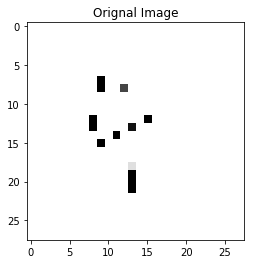

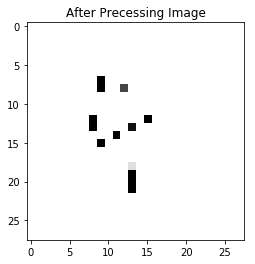

[5 4 1 8 8 8 3 8 5 5 8 4 8 5 9 9 8 4 8 3]
[1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0]

Accurancy:  0.05


In [19]:
#https://stackoverflow.com/a/12201744/3628117
#The img.convert('L') doesnot produce array with shape(28,28)
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])

imgs = np.zeros(shape=(20,784))
for x in range(1,21):
    img = keras.preprocessing.image.load_img(path='./handwrite2/{0}.png'.format(x), target_size=(28,28)) #Set target size with tuple
    gray = rgb2gray(np.array(img)) #Conver the rgb file to greyscale
    arr = np.array(gray)
    arr = arr.astype('float32') / 255.0
    arr = arr.reshape(-1, 28*28)
    arr = np.absolute((arr - 1)) #Invert the color, eg [1, 0.6, ....] => [0, 0.4, ...]
    imgs[x-1] = arr
        
name = 4

plt.imshow(keras.preprocessing.image.load_img(path='./handwrite2/{0}.png'.format(name), target_size=(28,28)) , cmap=plt.cm.binary)
plt.title('Orignal Image')
plt.show()
        
plt.imshow(imgs[name-1].reshape(28,28), cmap=plt.cm.binary)
plt.title('After Precessing Image')
plt.show()
   
labels = np.array([1,2,3,4,5,6,7,8,9,0,1,2,3,4,5,6,7,8,9,0])

preds = model.predict(imgs)

pred = []
for x in range(0,len(preds)):
    maxIndex = np.argmax(preds[x])
    pred.append(maxIndex)

arr_pred = np.array(pred)
arr_label = np.array(labels)
print(arr_pred)
print(arr_label)
print("\nAccurancy: ",np.sum(arr_pred == arr_label) / len(arr_label))

An even more low pixelfied set of hand write digits, the prediction accurancy drops even more...

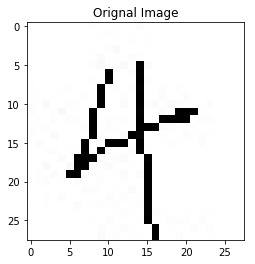

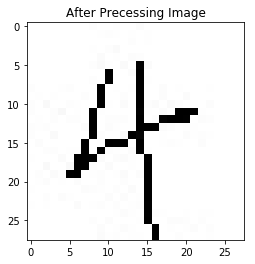

[1 3 2 8 5 8 7 3 2 0 8 2 2 9 8 6 8 5 1 4]
[1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0]

Accurancy:  0.3


In [20]:
#https://stackoverflow.com/a/12201744/3628117
#The img.convert('L') doesnot produce array with shape(28,28)
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])

imgs = np.zeros(shape=(20,784))
for x in range(1,21):
    img = keras.preprocessing.image.load_img(path='./handwrite3/{0}.jpg'.format(x), target_size=(28,28)) #Set target size with tuple
    gray = rgb2gray(np.array(img)) #Conver the rgb file to greyscale
    arr = np.array(gray)
    arr = arr.astype('float32') / 255.0
    arr = arr.reshape(-1, 28*28)
    arr = np.absolute((arr - 1)) #Invert the color, eg [1, 0.6, ....] => [0, 0.4, ...]
    imgs[x-1] = arr
        
name = 4

plt.imshow(keras.preprocessing.image.load_img(path='./handwrite3/{0}.jpg'.format(name), target_size=(28,28)) , cmap=plt.cm.binary)
plt.title('Orignal Image')
plt.show()
        
plt.imshow(imgs[name-1].reshape(28,28), cmap=plt.cm.binary)
plt.title('After Precessing Image')
plt.show()
   
labels = np.array([1,2,3,4,5,6,7,8,9,0,1,2,3,4,5,6,7,8,9,0])

preds = model.predict(imgs)

pred = []
for x in range(0,len(preds)):
    maxIndex = np.argmax(preds[x])
    pred.append(maxIndex)

arr_pred = np.array(pred)
arr_label = np.array(labels)
print(arr_pred)
print(arr_label)
print("\nAccurancy: ",np.sum(arr_pred == arr_label) / len(arr_label))